In [1]:
import torch
import torchvision
from model import VaeInnModel
import pytorch_lightning as pl

BATCH_SIZE = 10 # create BATCH_SIZE images in total

model = VaeInnModel()
pl.seed_everything(42)
model.load_state_dict(torch.load("model.pt"))
model.eval()
model.cuda()
#img = torchvision.io.image.read_image("airplane1.png").cuda()
#img = torch.unsqueeze(img, 0) / 255.0
#lst = [img for i in range(0, BATCH_SIZE)]
#img = torch.cat(lst)
#img.shape
#sample, _, _ = model(img)
#latent_samples = model.encoder(img)
#latent_samples.shape
#model.encoder(torch.randn(1,3,16,16).cuda()).shape
samples = model.innmodule.inn.inverse(torch.randn((BATCH_SIZE, 64)).cuda()).detach()
samples = samples.reshape((BATCH_SIZE, 4, 4, 4))
samples.shape

/home/bora/miniconda3/envs/vae-inn/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Cannot initialize model with low cpu memory usage because `accelerate` was not found in the environment. Defaulting to `low_cpu_mem_usage=False`. It is strongly recommended to install `accelerate` for faster and less memory-intense model loading. You can do so with: 
```
pip install accelerate
```
.
Global seed set to 42


torch.Size([10, 4, 4, 4])

In [2]:
decoded_img = model.encoder.sd_vae.tiled_decode(samples)
decoded_img.sample.shape

torch.Size([10, 3, 32, 32])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


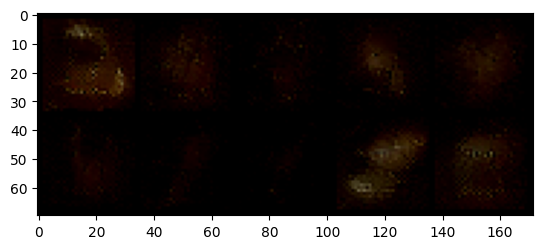

In [3]:
import torchvision
import matplotlib.pyplot as plt

#decoded_img = torch.zeros((BATCH_SIZE,3,32,32))
grid_img = torchvision.utils.make_grid(decoded_img.sample.cpu(), nrow=5)
plt.imshow(grid_img.permute(1, 2, 0))
